In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy as cart
import pandas as pd
import cartopy as cart
import os


Bad key "text.kerning_factor" on line 4 in
C:\Users\fb428\Miniconda3\envs\flossmain\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.getcwd()

'C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_scripts'

In [3]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------
os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files')

site_info = pd.read_csv('station_info.csv')

locs = site_info[['item', 'name', 'Lat', 'Lon']].drop_duplicates()

In [4]:
mean_locs = locs.groupby('name').mean().reset_index()

In [5]:
mean_locs

,name,item,Lat,Lon
0,Amazonas,17.750000,-3.010550,-60.229250
1,Bogota,0.937500,4.897599,-74.359194
2,Bukit Koto,4.000000,-0.200000,100.320000
3,Congo,14.000000,0.480000,24.300000
4,Daintree,15.000000,-16.100000,145.400000
5,Darwin,21.000000,-12.456667,130.900000
6,Jakarta,5.000000,-6.411067,107.088133
7,Mt. Kenya,9.000000,-0.062000,37.297000
8,Panama,16.000000,9.150000,-79.830000
9,Porto Velho,19.000000,-8.687000,-63.869000


In [6]:
low_elev = mean_locs[(mean_locs['name'] != 'Tanah Rata') & (mean_locs['name'] != 'Mt. Kenya')]

In [43]:
loc = pd.merge(pd.DataFrame(np.array([['Bogota',1,-1],['Bukit Koto', 3, -3], ['Congo', 1, -6], ['Daintree', -10, -8],
                               ['Darwin', -8, -8], ['Jakarta', 2, 1], ['Santarem',-4, 3 ], ['Panama',2, -6 ],
                               ['Porto Velho', -10, -4], ['San Lorenzo', -8, -8], ['Sao Paulo',-4,3], 
                               ['Amazonas', 1, -3], ['Watukosek', -4,3]]), columns = ['name', 'y_space', 'x_space']), low_elev, on='name')

In [45]:
loc.iloc[-3,0] = r'S$\tilde\mathrm{a}$o Paulo'
loc.iloc[0,0] =  r'Bogot$\acute\mathrm{a}$'

In [58]:
import matplotlib
matplotlib.rc('axes',edgecolor='grey')

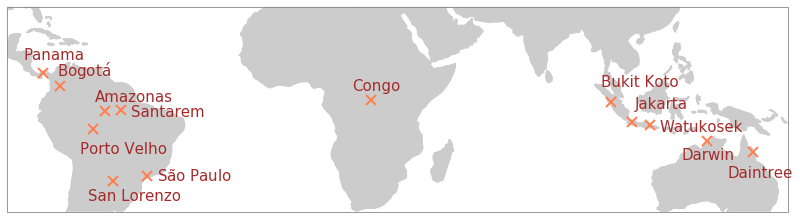

In [61]:
fig, axs = plt.subplots(1,1, figsize=(14, 10), subplot_kw=dict(projection=cart.crs.PlateCarree()))

x = np.linspace(0,180,20)
y = np.linspace(-40,40,20)

plt.plot(loc.Lon.values, loc.Lat.values, 'x', markersize=10, markeredgewidth=2, color='coral')

for i in range(len(loc)):
    t = plt.text(loc.Lon.values[i]+int(loc.x_space.values[i]),
                 loc.Lat.values[i]+2+int(loc.y_space.values[i]),
                 loc.name.values[i], 
                 color='brown', size=15)
    #t.set_bbox(dict(facecolor='mistyrose', alpha=0.6, edgecolor='mistyrose'))

axs.coastlines(color=(0.8,0.8,0.8))
axs.add_feature(cart.feature.LAND,facecolor=(0.8,0.8,0.8))

axs.set_ylim(-35,30)

plt.savefig('map.png', dpi=300)

In [66]:
int(loc.x_space[i])

-1